In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import tensorflow as tf
tf.__version__
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from scipy import stats

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from keras.preprocessing.image import ImageDataGenerator
import cv2
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.naive_bayes import GaussianNB

%matplotlib inline
sns.set(color_codes=True)

In [20]:
labels = ['Black-grass', 'Charlock','Cleavers','Common Chickweed','Common Wheat','Fat Hen','Loose Silky-bent','Maize','Scentless Mayweed','Shepherds Purse','Small-flowered Cranesbill','Sugar beet']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE) #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [21]:
train = get_data('C:/Users/tusso/Downloads/pyNB/08_ComputerVision_CNN/train')

<ipython-input-20-7276c1fed4fa>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


<AxesSubplot:xlabel='count'>

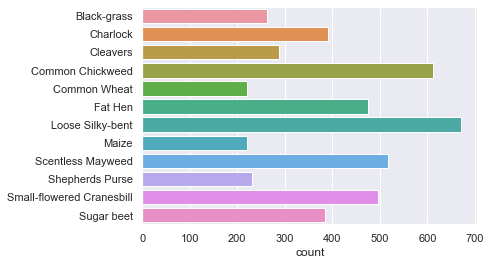

In [22]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Black-grass")
    elif(i[1]==1):
        l.append("Charlock")
    elif(i[1]==2):
        l.append("Cleavers")
    elif(i[1]==3):
        l.append("Common Chickweed")
    elif(i[1]==4):
        l.append("Common Wheat")
    elif(i[1]==5):
        l.append("Fat Hen")
    elif(i[1]==6):
        l.append("Loose Silky-bent")
    elif(i[1]==7):   
        l.append("Maize")
    elif(i[1]==8):
        l.append("Scentless Mayweed")
    elif(i[1]==9):
        l.append("Shepherds Purse")
    elif(i[1]==10):
        l.append("Small-flowered Cranesbill")
    else:
        l.append("Sugar beet")
sns.set_style('darkgrid')
sns.countplot(y=l)

Text(0.5, 1.0, 'Black-grass')

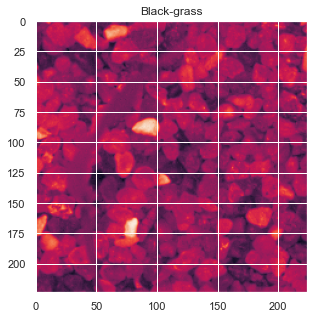

In [23]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'Charlock')

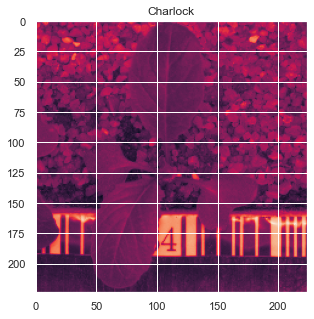

In [24]:
plt.figure(figsize = (5,5))
plt.imshow(train[267][0])
plt.title(labels[train[267][1]])

Text(0.5, 1.0, 'Cleavers')

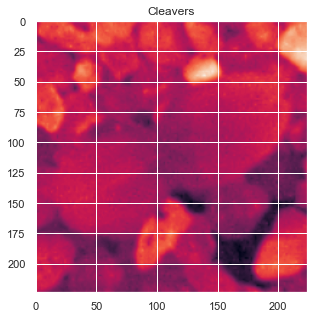

In [25]:
plt.figure(figsize = (5,5))
plt.imshow(train[660][0])
plt.title(labels[train[660][1]])

Text(0.5, 1.0, 'Common Chickweed')

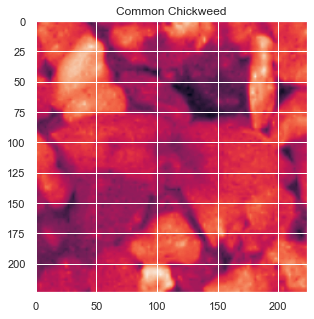

In [26]:
plt.figure(figsize = (5,5))
plt.imshow(train[950][0])
plt.title(labels[train[950][1]])

### Splitting labels and images.

In [27]:
x_train = []
y_train = []
for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

In [28]:
print("Total no of images :",len(x_train))
print("Total no of labels :",len(y_train))

Total no of images : 4767
Total no of labels : 4767


In [29]:
x_train[1]

array([[ 46,  48,  55, ..., 121, 120, 113],
       [ 50,  51,  50, ..., 122, 117, 102],
       [ 49,  51,  55, ..., 107, 100,  95],
       ...,
       [ 55,  56,  58, ...,  83,  82,  79],
       [ 57,  61,  58, ...,  82,  81,  80],
       [ 59,  61,  62, ...,  80,  79,  75]], dtype=uint8)

In [30]:
y_train[1]

0

In [31]:
x_train[4766]

array([[87, 84, 90, ..., 76, 76, 73],
       [84, 92, 87, ..., 80, 78, 67],
       [87, 91, 84, ..., 69, 68, 66],
       ...,
       [72, 71, 74, ..., 89, 76, 53],
       [70, 72, 72, ..., 79, 72, 44],
       [70, 75, 74, ..., 57, 51, 42]], dtype=uint8)

In [32]:
y_train[4766]

11

In [33]:
x_train = np.array(x_train)
y_train= np.array(y_train)

### Resizing images.

In [34]:
x_train_resized=np.zeros((x_train.shape[0],50,50))
for i in range(x_train.shape[0]):
    #using cv2.resize to resize each train example to 28X28 size using Cubic interpolation
    x_train_resized[i,:,:]=cv2.resize(x_train[i],dsize=(50,50),interpolation=cv2.INTER_CUBIC)
x_train = x_train_resized.reshape(x_train_resized.shape[0], 50, 50, 1)
x_train = x_train/ 255

In [35]:
print("Shape of data :",x_train.shape)
print("Shape of labels :",y_train.shape)

Shape of data : (4767, 50, 50, 1)
Shape of labels : (4767,)


### Train and test split.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.30, random_state=1)

### Data augmentation.

In [37]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [38]:
val_gen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)

val_gen.fit(X_test)

### NN

In [39]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(input_shape=(12,)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(12, activation='softmax')
])

In [40]:
model1.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [41]:
history1=model1.fit(datagen.flow(X_train, y_train, batch_size=64),validation_data=(X_test,y_test),epochs=30,verbose=1)

Epoch 1/30
53/53 [==============================] - 2s 45ms/step - loss: 2.5193 - accuracy: 0.1400 - val_loss: 2.4665 - val_accuracy: 0.0643
Epoch 2/30
53/53 [==============================] - 2s 42ms/step - loss: 2.3927 - accuracy: 0.1559 - val_loss: 2.4577 - val_accuracy: 0.1328
Epoch 3/30
53/53 [==============================] - 2s 42ms/step - loss: 2.3636 - accuracy: 0.1670 - val_loss: 2.4213 - val_accuracy: 0.1349
Epoch 4/30
53/53 [==============================] - 2s 41ms/step - loss: 2.3513 - accuracy: 0.1766 - val_loss: 2.4167 - val_accuracy: 0.1551
Epoch 5/30
53/53 [==============================] - 2s 42ms/step - loss: 2.3461 - accuracy: 0.1652 - val_loss: 2.3915 - val_accuracy: 0.1530
Epoch 6/30
53/53 [==============================] - 2s 43ms/step - loss: 2.3301 - accuracy: 0.1772 - val_loss: 2.3553 - val_accuracy: 0.1803
Epoch 7/30
53/53 [==============================] - 2s 41ms/step - loss: 2.3159 - accuracy: 0.1760 - val_loss: 2.3455 - val_accuracy: 0.1740
Epoch 8/30
53

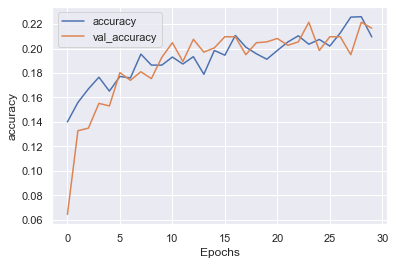

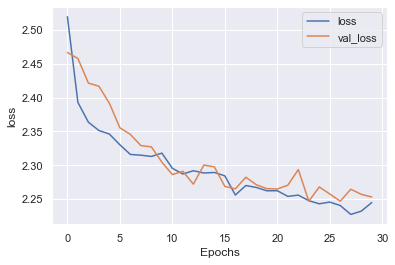

In [42]:
import matplotlib.pyplot as plt


def plot_graphs(history1, string):
    plt.plot(history1.history[string])
    plt.plot(history1.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history1, 'accuracy')
plot_graphs(history1, 'loss')

### CNN

In [43]:
model2 = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(50, 50, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #tf.keras.layers.BatchNormalization(),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    # 512 neuron hidden layer
    #tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(12, activation='softmax')
])

In [44]:
model2.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [45]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 128)        

In [46]:
history2=model2.fit(datagen.flow(X_train, y_train, batch_size=64),validation_data=(X_test,y_test),epochs=80,verbose=1)

Epoch 1/80
53/53 [==============================] - 10s 192ms/step - loss: 2.4358 - accuracy: 0.1370 - val_loss: 2.4150 - val_accuracy: 0.1398
Epoch 2/80
53/53 [==============================] - 9s 178ms/step - loss: 2.4174 - accuracy: 0.1403 - val_loss: 2.4077 - val_accuracy: 0.1398
Epoch 3/80
53/53 [==============================] - 10s 179ms/step - loss: 2.3993 - accuracy: 0.1478 - val_loss: 2.3685 - val_accuracy: 0.1642
Epoch 4/80
53/53 [==============================] - 10s 180ms/step - loss: 2.3702 - accuracy: 0.1628 - val_loss: 2.3841 - val_accuracy: 0.1663
Epoch 5/80
53/53 [==============================] - 9s 178ms/step - loss: 2.3426 - accuracy: 0.1616 - val_loss: 2.3897 - val_accuracy: 0.1712
Epoch 6/80
53/53 [==============================] - 10s 182ms/step - loss: 2.3339 - accuracy: 0.1631 - val_loss: 2.3433 - val_accuracy: 0.1782
Epoch 7/80
53/53 [==============================] - 10s 185ms/step - loss: 2.3094 - accuracy: 0.1802 - val_loss: 2.3270 - val_accuracy: 0.1495
E

Epoch 58/80
53/53 [==============================] - 10s 183ms/step - loss: 1.0127 - accuracy: 0.6364 - val_loss: 1.2817 - val_accuracy: 0.5570
Epoch 59/80
53/53 [==============================] - 10s 184ms/step - loss: 1.0237 - accuracy: 0.6376 - val_loss: 1.3083 - val_accuracy: 0.5542
Epoch 60/80
53/53 [==============================] - 10s 180ms/step - loss: 0.9749 - accuracy: 0.6538 - val_loss: 1.3550 - val_accuracy: 0.5563
Epoch 61/80
53/53 [==============================] - 10s 183ms/step - loss: 0.9676 - accuracy: 0.6520 - val_loss: 1.6176 - val_accuracy: 0.5087
Epoch 62/80
53/53 [==============================] - 10s 180ms/step - loss: 1.0188 - accuracy: 0.6340 - val_loss: 1.2737 - val_accuracy: 0.5604
Epoch 63/80
53/53 [==============================] - 10s 179ms/step - loss: 0.9862 - accuracy: 0.6439 - val_loss: 1.1455 - val_accuracy: 0.5947
Epoch 64/80
53/53 [==============================] - 10s 180ms/step - loss: 0.9606 - accuracy: 0.6454 - val_loss: 1.2010 - val_accuracy:

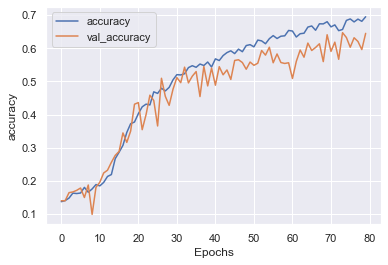

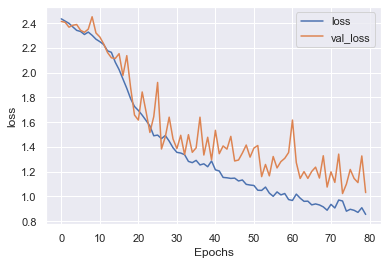

In [47]:
import matplotlib.pyplot as plt


def plot_graphs(history2, string):
    plt.plot(history2.history[string])
    plt.plot(history2.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history2, 'accuracy')
plot_graphs(history2, 'loss')

### Saving the model.

In [48]:
model2.save("CNN_model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: CNN_model\assets


### Supervised Learning : Naive Bayes

In [49]:
X_train=X_train.reshape(len(X_train),X_train.shape[1]*X_train.shape[2])
X_test=X_test.reshape(len(X_test),X_test.shape[1]*X_test.shape[2])
y_train=y_train.reshape(y_train.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)

In [50]:
print("Shape of data :",X_train.shape)
print("Shape of labels :",y_train.shape)

Shape of data : (3336, 2500)
Shape of labels : (3336, 1)


In [51]:
gaus_model = GaussianNB()
gaus_model.fit(X_train, y_train)

# Predicting for test set
gaus_predicted = gaus_model.predict(X_test)
gaus_score = gaus_model.score(X_test, y_test)

gaus_model_y_predicted = gaus_model.predict(X_test)
gaus_accuracy = accuracy_score(y_test, gaus_model_y_predicted)
gaus_confusion_matrix = metrics.confusion_matrix(y_test, gaus_model_y_predicted)

C:\Users\tusso\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [52]:
print('Gaussian Model Accuracy Score  : %f'  % gaus_accuracy)

Gaussian Model Accuracy Score  : 0.149546


### Of all the three, CNN had the highest accuracy. Using it on test image.

In [53]:
test_image = cv2.imread("predict.png",cv2.IMREAD_GRAYSCALE)

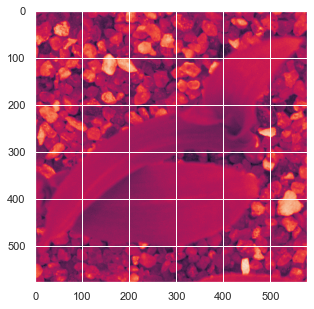

In [54]:
plt.figure(figsize = (5,5))
plt.imshow(test_image)

In [55]:
test_image=cv2.resize(test_image,dsize=(50,50),interpolation=cv2.INTER_CUBIC)
test_image=test_image.reshape(1,50,50,1)

In [56]:
typ= model2.predict(test_image)

In [57]:
print(typ)

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
# ['Black-grass', 'Charlock','Cleavers','Common Chickweed','Common Wheat','Fat Hen','Loose Silky-bent','Maize',...
#  'Scentless Mayweed','Shepherds Purse','Small-flowered Cranesbill','Sugar beet']

# The above prediction can clearly be visually inspected and the predicted class, i.e. 'Loose Silky-bent', can be termed as
# a wrong prediction. Therefore, we need to develop a new CNN model since the accuracy of this model is the highest.

# Also, the prediction would improve if we took all the colors into account without any unnecessary background. 

#### Obtaining images and resizing to 70 x 70 px. We use this size for a quicker training of model. Also, here we get image labels from folder name.

In [1]:
import cv2
from glob import glob
import numpy as np
from matplotlib import pyplot as plt
import math
import pandas as pd

ScaleTo = 70  # px to scale
seed = 7  # fixing random

path = '../08_ComputerVision_CNN/train/*/*.png' 
files = glob(path)

trainImg = []
trainLabel = []
j = 1
num = len(files)

# Obtain images and resizing, obtain labels
for img in files:
    print(str(j) + "/" + str(num), end="\r")
    trainLabel.append(img.split('\\')[-2])  # Get image label (folder name)
    trainImg.append(cv2.resize(cv2.imread(img), (ScaleTo, ScaleTo)))
    j += 1

trainLabel = pd.DataFrame(trainLabel)  # Train labels set
trainImg = np.asarray(trainImg)  # Train images set

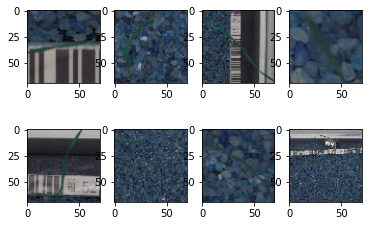

In [2]:
# Some example images of plants.
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(trainImg[i])

#### Every photo of plant seedling has a background, so we try to remove it. It'll help us to goal better model accuracy.

In [ ]:
# For removing the background, we'll use the fact, that all plants on our photos are green.
# We can create a mask, which will leave some range of green color and remove other parts of the image.

# For creating mask, which will remove background, we need to convert RGB image to HSV.
# HSV is an alternative of the RGB color model. In HSV, it is easier to represent a color range than in RGB color space.




# Besides of this, we'll blur image firstly for removing noise.

# After creating HSV image, we'll create mask based on empirically selected range of green color, convert it to
# boolean mask and apply it to the origin image.



# Use gaussian blur for remove noise
# Convert color to HSV
# Create mask
# Create boolean mask
# Apply boolean mask and getting image whithout background

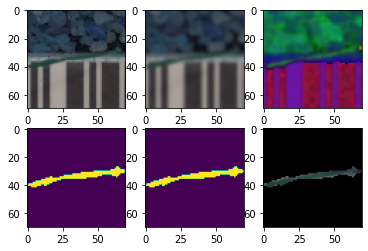

In [4]:
clearTrainImg = []
examples = []; getEx = True
for img in trainImg:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
    
    # Convert to HSV image
    hsvImg = cv2.cvtColor(blurImg, cv2.COLOR_BGR2HSV)  
    
    # Create mask (parameters - green color)
    mask = cv2.inRange(hsvImg, (25, 40, 50), (75, 255, 255))  
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    # Create bool mask
    bMask = mask > 0  
    clear = np.zeros_like(img, np.uint8)
    clear[bMask] = img[bMask]
    clearTrainImg.append(clear)
    if getEx:
        plt.subplot(2, 3, 1); plt.imshow(img)
        plt.subplot(2, 3, 2); plt.imshow(blurImg)
        plt.subplot(2, 3, 3); plt.imshow(hsvImg)
        plt.subplot(2, 3, 4); plt.imshow(mask)
        plt.subplot(2, 3, 5); plt.imshow(bMask)
        plt.subplot(2, 3, 6); plt.imshow(clear)
        getEx = False
clearTrainImg = np.asarray(clearTrainImg)

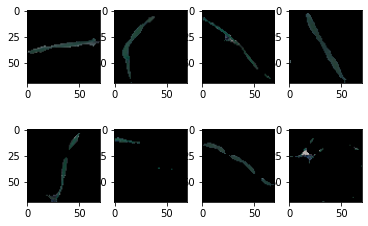

In [6]:
# Show sample result
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(clearTrainImg[i])

In [8]:
clearTrainImg = clearTrainImg / 255

Classes: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
Number of classes: 12


<AxesSubplot:>

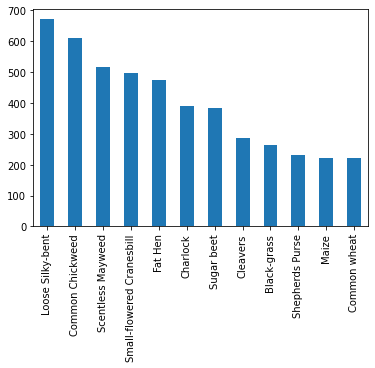

In [9]:
from keras.utils import np_utils
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Encode labels
le = preprocessing.LabelEncoder()
le.fit(trainLabel[0])
print("Classes: " + str(le.classes_))
encodeTrainLabels = le.transform(trainLabel[0])

# Make labels categorical
clearTrainLabel = np_utils.to_categorical(encodeTrainLabels)
num_clases = clearTrainLabel.shape[1]
print("Number of classes: " + str(num_clases))

# plt.hist(clearTrainLabel)
trainLabel[0].value_counts().plot(kind='bar')

In [10]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(clearTrainImg, clearTrainLabel, 
                                                test_size=0.1, random_state=seed, 
                                                stratify = clearTrainLabel)

In [11]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically 
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True  # randomly flip images vertically
    )  
datagen.fit(trainX)

In [22]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization

# numpy.random.seed(seed)  # Fix seed

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(ScaleTo, ScaleTo, 3), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_clases, activation='softmax'))

model.summary()

# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 66, 66, 64)        4864      
_________________________________________________________________
batch_normalization_11 (Batc (None, 66, 66, 64)        256       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 62, 62, 64)        102464    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 31, 31, 64)        256       
_________________________________________________________________
dropout_9 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 27, 27, 128)      

Epoch 1/100
86/86 [==============================] - ETA: 0s - loss: 1.2064 - accuracy: 0.5888
Epoch 00001: val_accuracy improved from -inf to 0.09434, saving model to weights.model_1.hdf5
86/86 [==============================] - 210s 2s/step - loss: 1.2064 - accuracy: 0.5888 - val_loss: 7.7721 - val_accuracy: 0.0943
Epoch 2/100
86/86 [==============================] - ETA: 0s - loss: 1.1340 - accuracy: 0.6273
Epoch 00002: val_accuracy did not improve from 0.09434
86/86 [==============================] - 210s 2s/step - loss: 1.1340 - accuracy: 0.6273 - val_loss: 5.5758 - val_accuracy: 0.0629
Epoch 3/100
86/86 [==============================] - ETA: 0s - loss: 1.0469 - accuracy: 0.6471
Epoch 00003: val_accuracy improved from 0.09434 to 0.27463, saving model to weights.model_1.hdf5
86/86 [==============================] - 211s 2s/step - loss: 1.0469 - accuracy: 0.6471 - val_loss: 7.0187 - val_accuracy: 0.2746
Epoch 4/100
86/86 [==============================] - ETA: 0s - loss: 0.9706 - a

Epoch 28/100
86/86 [==============================] - ETA: 0s - loss: 0.3584 - accuracy: 0.8727
Epoch 00028: val_accuracy did not improve from 0.89727
86/86 [==============================] - 210s 2s/step - loss: 0.3584 - accuracy: 0.8727 - val_loss: 0.7316 - val_accuracy: 0.7463
Epoch 29/100
86/86 [==============================] - ETA: 0s - loss: 0.3298 - accuracy: 0.8848
Epoch 00029: val_accuracy did not improve from 0.89727
86/86 [==============================] - 211s 2s/step - loss: 0.3298 - accuracy: 0.8848 - val_loss: 0.3827 - val_accuracy: 0.8763
Epoch 30/100
86/86 [==============================] - ETA: 0s - loss: 0.3590 - accuracy: 0.8739
Epoch 00030: val_accuracy did not improve from 0.89727

Epoch 00030: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
86/86 [==============================] - 210s 2s/step - loss: 0.3590 - accuracy: 0.8739 - val_loss: 0.3399 - val_accuracy: 0.8805
Epoch 31/100
86/86 [==============================] - ETA: 0s - loss: 0.3454 

Epoch 56/100
86/86 [==============================] - ETA: 0s - loss: 0.2795 - accuracy: 0.8977
Epoch 00056: val_accuracy did not improve from 0.92453
86/86 [==============================] - 207s 2s/step - loss: 0.2795 - accuracy: 0.8977 - val_loss: 0.2335 - val_accuracy: 0.9099
Epoch 57/100
86/86 [==============================] - ETA: 0s - loss: 0.2808 - accuracy: 0.9014
Epoch 00057: val_accuracy did not improve from 0.92453
86/86 [==============================] - 209s 2s/step - loss: 0.2808 - accuracy: 0.9014 - val_loss: 0.2235 - val_accuracy: 0.9140
Epoch 58/100
86/86 [==============================] - ETA: 0s - loss: 0.2696 - accuracy: 0.8986
Epoch 00058: val_accuracy did not improve from 0.92453
86/86 [==============================] - 209s 2s/step - loss: 0.2696 - accuracy: 0.8986 - val_loss: 0.2368 - val_accuracy: 0.9036
Epoch 59/100
86/86 [==============================] - ETA: 0s - loss: 0.2786 - accuracy: 0.9009
Epoch 00059: val_accuracy did not improve from 0.92453
86/86 

86/86 [==============================] - ETA: 0s - loss: 0.2613 - accuracy: 0.9026
Epoch 00085: val_accuracy did not improve from 0.92662
86/86 [==============================] - 209s 2s/step - loss: 0.2613 - accuracy: 0.9026 - val_loss: 0.2206 - val_accuracy: 0.9224
Epoch 86/100
86/86 [==============================] - ETA: 0s - loss: 0.2661 - accuracy: 0.9019
Epoch 00086: val_accuracy did not improve from 0.92662
86/86 [==============================] - 210s 2s/step - loss: 0.2661 - accuracy: 0.9019 - val_loss: 0.2293 - val_accuracy: 0.9245
Epoch 87/100
86/86 [==============================] - ETA: 0s - loss: 0.2684 - accuracy: 0.9019
Epoch 00087: val_accuracy did not improve from 0.92662
86/86 [==============================] - 209s 2s/step - loss: 0.2684 - accuracy: 0.9019 - val_loss: 0.2397 - val_accuracy: 0.9161
Epoch 88/100
86/86 [==============================] - ETA: 0s - loss: 0.2643 - accuracy: 0.9054
Epoch 00088: val_accuracy did not improve from 0.92662
86/86 [============

Text(0.5, 0, 'epoch')

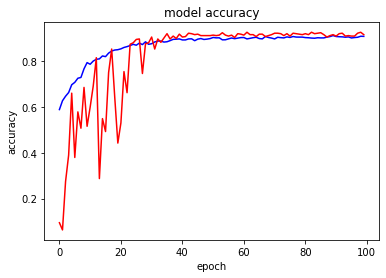

In [26]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# learning rate reduction
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

# checkpoint
filepath="weights.model_1.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint, learning_rate_reduction]

# fit model
hist = model.fit(datagen.flow(trainX, trainY, batch_size=50), 
                            epochs=100, validation_data=(testX, testY), callbacks=callbacks_list)

# accuracy graph
plt.plot(hist.history['accuracy'], color='b', label="Training acc")
plt.plot(hist.history['val_accuracy'], color='r', label="Value acc")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [56]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

# learning rate reduction
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.4, 
                                            min_lr=0.00001)

# checkpoints
filepath="weights.model_1_{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', 
                             verbose=1, save_best_only=True, mode='max')
filepath="weights.model_1_last.hdf5"
checkpoint_all = ModelCheckpoint(filepath, monitor='val_accuracy', 
                                 verbose=1, save_best_only=False, mode='max')

# all callbacks
callbacks_list = [checkpoint, learning_rate_reduction, checkpoint_all]

# fit model
hist = model.fit(datagen.flow(trainX, trainY, batch_size=75), 
                            epochs=35, validation_data=(testX, testY), callbacks=callbacks_list)

Epoch 1/35
58/58 [==============================] - ETA: 0s - loss: 0.2572 - accuracy: 0.9042
Epoch 00001: val_accuracy improved from -inf to 0.91405, saving model to weights.model_1_01-0.91.hdf5

Epoch 00001: saving model to weights.model_1_last.hdf5
58/58 [==============================] - 204s 4s/step - loss: 0.2572 - accuracy: 0.9042 - val_loss: 0.2796 - val_accuracy: 0.9140
Epoch 2/35
58/58 [==============================] - ETA: 0s - loss: 0.2584 - accuracy: 0.9079
Epoch 00002: val_accuracy improved from 0.91405 to 0.91824, saving model to weights.model_1_02-0.92.hdf5

Epoch 00002: saving model to weights.model_1_last.hdf5
58/58 [==============================] - 209s 4s/step - loss: 0.2584 - accuracy: 0.9079 - val_loss: 0.2469 - val_accuracy: 0.9182
Epoch 3/35
58/58 [==============================] - ETA: 0s - loss: 0.2544 - accuracy: 0.9084
Epoch 00003: val_accuracy did not improve from 0.91824

Epoch 00003: saving model to weights.model_1_last.hdf5
58/58 [=====================

Epoch 25/35
58/58 [==============================] - ETA: 0s - loss: 0.2510 - accuracy: 0.9091
Epoch 00025: val_accuracy did not improve from 0.92034

Epoch 00025: saving model to weights.model_1_last.hdf5
58/58 [==============================] - 209s 4s/step - loss: 0.2510 - accuracy: 0.9091 - val_loss: 0.2238 - val_accuracy: 0.9161
Epoch 26/35
58/58 [==============================] - ETA: 0s - loss: 0.2389 - accuracy: 0.9110
Epoch 00026: val_accuracy did not improve from 0.92034

Epoch 00026: saving model to weights.model_1_last.hdf5
58/58 [==============================] - 215s 4s/step - loss: 0.2389 - accuracy: 0.9110 - val_loss: 0.3678 - val_accuracy: 0.8323
Epoch 27/35
58/58 [==============================] - ETA: 0s - loss: 0.2607 - accuracy: 0.9072
Epoch 00027: val_accuracy did not improve from 0.92034

Epoch 00027: saving model to weights.model_1_last.hdf5
58/58 [==============================] - 220s 4s/step - loss: 0.2607 - accuracy: 0.9072 - val_loss: 0.6208 - val_accuracy:

In [33]:
#model.save('../08_ComputerVision_CNN/weights.model_1.hdf5')

In [69]:
model.load_weights("../08_ComputerVision_CNN/weights.model_1_13-0.92.hdf5")

print(model.evaluate(trainX, trainY))
print(model.evaluate(testX, testY))

135/135 [==============================] - 27s 204ms/step - loss: 0.1674 - accuracy: 0.9329
[0.1674429327249527, 0.9328671097755432]
15/15 [==============================] - 3s 193ms/step - loss: 0.2347 - accuracy: 0.9203
[0.23466506600379944, 0.9203354120254517]


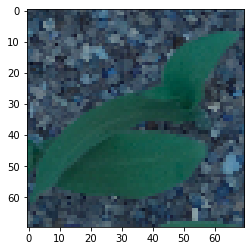

In [78]:
path = '../08_ComputerVision_CNN/*.png'
files = glob(path)

testImg = []
testId = []
j = 1
num = len(files)

# Obtain images and resizing, obtain labels
for img in files:
    print("Obtain images: " + str(j) + "/" + str(num), end='\r')
    testId.append(img.split('\\')[-1])  # Images id's
    testImg.append(cv2.resize(cv2.imread(img), (ScaleTo, ScaleTo)))
    j += 1

testImg = np.asarray(testImg)  # Train images set

plt.imshow(testImg[0])

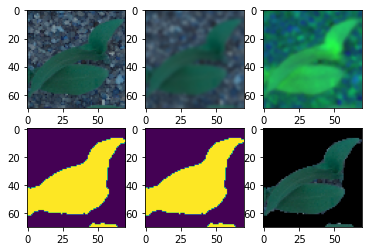

In [79]:
clearTestImg = []
examples = []; getEx = True
for img in testImg:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
    
    # Convert to HSV image
    hsvImg = cv2.cvtColor(blurImg, cv2.COLOR_BGR2HSV)  
    
    # Create mask (parameters - green color range)
    lower_green = (25, 40, 50)
    upper_green = (75, 255, 255)
    mask = cv2.inRange(hsvImg, lower_green, upper_green)  
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    # Create bool mask
    bMask = mask > 0  
    
    # Apply the mask
    clear = np.zeros_like(img, np.uint8)  # Create empty image
    clear[bMask] = img[bMask]  # Apply boolean mask to the origin image
    
    clearTestImg.append(clear)  # Append image without backgroung
    
    # Show examples
    if getEx:
        plt.subplot(2, 3, 1); plt.imshow(img)  # Show the original image
        plt.subplot(2, 3, 2); plt.imshow(blurImg)  # Blur image
        plt.subplot(2, 3, 3); plt.imshow(hsvImg)  # HSV image
        plt.subplot(2, 3, 4); plt.imshow(mask)  # Mask
        plt.subplot(2, 3, 5); plt.imshow(bMask)  # Boolean mask
        plt.subplot(2, 3, 6); plt.imshow(clear)  # Image without background
        getEx = False

clearTestImg = np.asarray(clearTestImg)

In [80]:
clearTestImg = clearTestImg / 255

In [81]:
pred = model.predict(clearTestImg)

In [82]:
# Write result to file
predNum = np.argmax(pred, axis=1)
predStr = le.classes_[predNum]

print(predStr)

['Maize']


In [ ]:
# 'Maize' seems to be the right class after visual inspection. Therefore fine tuned CNN works best for preprocessed high quality data.